In [1]:
# import the necessary libraries

# For data augmentation while data preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Pretrained MobileNet model.
from tensorflow.keras.applications import MobileNetV2

# Performing MaxPooling operations
from tensorflow.keras.layers import MaxPooling2D

# For performing dropout operation
from tensorflow.keras.layers import Dropout

# For flattening operation
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

# Input() is used to instantiate a Keras tensor.
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model

# We use adam optimizer
from tensorflow.keras.optimizers import Adam

# Preprocesses a tensor or Numpy array encoding a batch of images.
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

# Converts a PIL Image instance to a Numpy array.
from tensorflow.keras.preprocessing.image import img_to_array

# Loads an image into PIL format.
from tensorflow.keras.preprocessing.image import load_img

# Converts a class vector (integers) to binary class matrix.
from tensorflow.keras.utils import to_categorical

# Binarize labels in a one-vs-all fashion.
from sklearn.preprocessing import LabelBinarizer

# Performing train-test split
from sklearn.model_selection import train_test_split

# For printing the metrics
from sklearn.metrics import classification_report

# For using strings in file structure path format
from imutils import paths

# For plotting losse functions
import matplotlib.pyplot as plt

# For performing mathematical computations
import numpy as np

# For file-related operations
import os

Total training images: 1840
Total training images (Damaged): 920
Total training images (Not Damaged): 920

Total validation images: 460
Total validation images (Damaged): 230
Total validation images (Not Damaged): 230

Total Number of Images: 2300


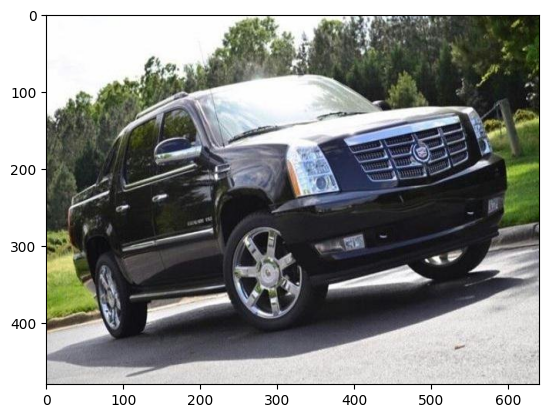

In [2]:
# Sugam jo location hoga usko perfect daalna 
DataDir = "C:/Users/user/OneDrive/Desktop/Sugam Car Detection ML/data1a"

# Path to training directory
train_dir = os.path.join(DataDir, 'training')

# Path to validation directory
val_dir = os.path.join(DataDir, 'validation')

# Path for damaged training images
train_damage = os.path.join(train_dir, '00-damage')
# Path for training images not damaged
train_not_damage = os.path.join(train_dir, '01-whole')

# Number of damaged training images
num_train_damage = len(os.listdir(train_damage))

# Number of training images not damaged
num_train_not_damage = len(os.listdir(train_not_damage))

# Path for damaged validation
val_damage = os.path.join(val_dir, '00-damage')

# Path for validation images not damaged
val_not_damage = os.path.join(val_dir, '01-whole')

# Number of damaged validation images
num_val_damage = len(os.listdir(val_damage))

# Number of validation images not damaged
num_val_not_damage = len(os.listdir(val_not_damage))

# Number of training images
num_train = num_train_damage + num_train_not_damage

# Number of validation images
num_val = num_val_damage + num_val_not_damage

# Total images
total_images = num_val + num_train
print("Total training images:", num_train)
print("Total training images (Damaged):", num_train_damage)
print("Total training images (Not Damaged):", num_train_not_damage)
print()

print("Total validation images:", num_val)
print("Total validation images (Damaged):", num_val_damage)
print("Total validation images (Not Damaged):", num_val_not_damage)
print()

print("Total Number of Images:", total_images)

# Plotting a sample image
plt.grid('')
image = plt.imread('C:/Users/user/OneDrive/Desktop/Sugam Car Detection ML/data1a/training/01-whole/0195.jpg')
plt.imshow(image)
plt.show()

# Sunn yahan pe alag alag images daal ke try karna yeh read ho raha hai ki nhi



initial_lr = 0.001
epochs = 100
batch_size = 64


classes = ["00-damage", "01-whole"]

In [3]:
# initializing the hyperparameters Yahan pe mai khela hu alag changes karke

initial_lr = 0.001
epochs = 75
batch_size = 32

# Classes which are detected
classes = ["00-damage", "01-whole"]


In [4]:
# Add missing imports  Saare important array wagera idhar hua hai
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.utils import to_categorical

# ... Apna  previous code ...

# It stores the data or feature set
data = []

# It stores the corresponding labels
labels = []

for class_ in classes:
    path = os.path.join(train_dir, class_)
    for image in os.listdir(path):
        image_path = os.path.join(path, image)
        image_ = load_img(image_path, target_size=(224, 224))
        image_ = img_to_array(image_)
        image_ = preprocess_input(image_)

        data.append(image_)
        labels.append(class_)

for class_ in classes:
    path = os.path.join(val_dir, class_)
    for image in os.listdir(path):
        image_path = os.path.join(path, image)
        image_ = load_img(image_path, target_size=(224, 224))
        image_ = img_to_array(image_)
        image_ = preprocess_input(image_)

        data.append(image_)
        labels.append(class_)
        
# perform one-hot encoding on the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

data = np.array(data, dtype="float32")
labels = np.array(labels)

(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.20, stratify=labels, random_state=42)


In [5]:
# Add missing import
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Construct the training image generator for data augmentation
aug = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)


In [6]:
# Add missing import
from tensorflow.keras.applications import MobileNetV2

# loading the MobileNetV2 network, ensuring the topmost fully-connected
# layer sets are left off
model_base = MobileNetV2(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))


In [7]:
from tensorflow.keras.layers import MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model

# Constructing the top architecture of our model, which is placed over the pretrained model
model_head = model_base.output

# MaxPooling layer
model_head = MaxPooling2D(pool_size=(5, 5))(model_head)

# Flatten layer
model_head = Flatten(name="flatten")(model_head)

# Activation function relu
model_head = Dense(128, activation="relu")(model_head)

# Performing dropout
model_head = Dropout(0.5)(model_head)

# Final output layer consists of softmax layer
model_head = Dense(2, activation="softmax")(model_head)

# Place the head FC model on top of the base model (this will become
# the actual model we will train)
model_final = Model(inputs=model_base.input, outputs=model_head)


In [8]:
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(1840, 224, 224, 3)
(1840, 2)
(460, 224, 224, 3)
(460, 2)


In [9]:
for layer in model_base.layers:  # AB tera training start
	layer.trainable = False

In [10]:
from tensorflow.keras.optimizers import Adam

# Compile the model
optimizer = Adam(learning_rate=initial_lr)
model_final.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the head of the network
model_train = model_final.fit(
    # Generates image generator from ImageDataGenerator for inputting images in batches
    aug.flow(trainX, trainY, batch_size=batch_size),
    
    # Number of steps to be taken in one epoch over image batches
    steps_per_epoch=len(trainX) // batch_size,
    
    # Validation data
    validation_data=(testX, testY),
    
    # Steps for validation data
    validation_steps=len(testX) // batch_size,
    
    # Number of epochs
    epochs=epochs
)


Epoch 1/75
57/57 [==============================] - 142s 2s/step - loss: 0.8661 - accuracy: 0.7284 - val_loss: 0.4322 - val_accuracy: 0.7804
Epoch 2/75
57/57 [==============================] - 124s 2s/step - loss: 0.4315 - accuracy: 0.8230 - val_loss: 0.3141 - val_accuracy: 0.8739
Epoch 3/75
57/57 [==============================] - 123s 2s/step - loss: 0.3777 - accuracy: 0.8379 - val_loss: 0.3447 - val_accuracy: 0.8370
Epoch 4/75
57/57 [==============================] - 125s 2s/step - loss: 0.3527 - accuracy: 0.8556 - val_loss: 0.3017 - val_accuracy: 0.8717
Epoch 5/75
57/57 [==============================] - 134s 2s/step - loss: 0.3283 - accuracy: 0.8584 - val_loss: 0.3840 - val_accuracy: 0.8391
Epoch 6/75
57/57 [==============================] - 134s 2s/step - loss: 0.3079 - accuracy: 0.8744 - val_loss: 0.2831 - val_accuracy: 0.8761
Epoch 7/75
57/57 [==============================] - 132s 2s/step - loss: 0.3313 - accuracy: 0.8645 - val_loss: 0.3077 - val_accuracy: 0.8674
Epoch 8/75
57

Epoch 59/75
57/57 [==============================] - 120s 2s/step - loss: 0.2057 - accuracy: 0.9137 - val_loss: 0.2812 - val_accuracy: 0.8804
Epoch 60/75
57/57 [==============================] - 123s 2s/step - loss: 0.2013 - accuracy: 0.9281 - val_loss: 0.3070 - val_accuracy: 0.8761
Epoch 61/75
57/57 [==============================] - 120s 2s/step - loss: 0.2099 - accuracy: 0.9115 - val_loss: 0.2781 - val_accuracy: 0.8783
Epoch 62/75
57/57 [==============================] - 121s 2s/step - loss: 0.2354 - accuracy: 0.9038 - val_loss: 0.2663 - val_accuracy: 0.8826
Epoch 63/75
57/57 [==============================] - 119s 2s/step - loss: 0.1987 - accuracy: 0.9209 - val_loss: 0.2851 - val_accuracy: 0.8761
Epoch 64/75
57/57 [==============================] - 121s 2s/step - loss: 0.1925 - accuracy: 0.9165 - val_loss: 0.2868 - val_accuracy: 0.8674
Epoch 65/75
57/57 [==============================] - 127s 2s/step - loss: 0.2163 - accuracy: 0.9115 - val_loss: 0.2386 - val_accuracy: 0.8804
Epoch 

In [11]:
# Now, we predict on the test set.
predict = model_final.predict(testX, batch_size=batch_size)

# For each image in the test set, we find the index of the label with the corresponding largest predicted probability.
predict_index = np.argmax(predict, axis=1)

# Displaying the classification report
print(classification_report(testY.argmax(axis=1), predict_index, target_names=lb.classes_))

# Storing our model for further use.
model_final.save("Car_damage_detection.model", save_format="h5")


15/15 [==============================] - 23s 1s/step
              precision    recall  f1-score   support

   00-damage       0.92      0.86      0.89       230
    01-whole       0.87      0.92      0.89       230

    accuracy                           0.89       460
   macro avg       0.89      0.89      0.89       460
weighted avg       0.89      0.89      0.89       460



In [12]:
import pickle

# Save the model using pickle
with open("model.pkl", "wb") as f:
    pickle.dump(model_final, f)


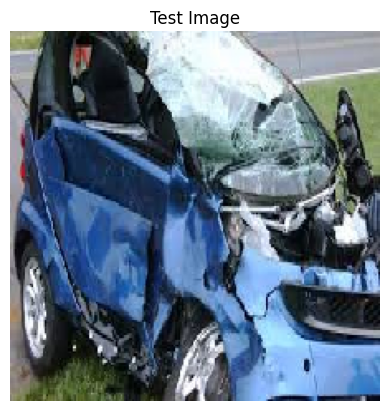

In [13]:
import matplotlib.pyplot as plt
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load the image from the internet (replace "your_image_path.jpg" with the actual image path)
image_path = "C:/Users/user/OneDrive/Desktop/Sugam Car Detection ML/data1a/training/00-damage/0016.jpeg"
image = load_img(image_path, target_size=(224, 224))
image_array = img_to_array(image)
preprocessed_image = preprocess_input(image_array)

# Display the test image
plt.imshow(image)
plt.title("Test Image")
plt.axis("off")
plt.show()


In [15]:
from tensorflow.keras.models import load_model
import numpy as np
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load the saved model directly using load_model
model_loaded = load_model("Car_damage_detection.model")

# Load the image from the internet (replace "your_image_path.jpg" with the actual image path)
image_path = "C:/Users/user/OneDrive/Desktop/Sugam Car Detection ML/data2a/validation/01-rear/0004.jpeg"
image = load_img(image_path, target_size=(224, 224))
image_array = img_to_array(image)
preprocessed_image = preprocess_input(image_array.reshape(1, 224, 224, 3))

# Make predictions
predictions = model_loaded.predict(preprocessed_image)

# Convert predictions to class labels
class_labels = ["00-damage", "01-whole"]
predicted_class_index = np.argmax(predictions)
predicted_class_label = class_labels[predicted_class_index]

# Print the result
if predicted_class_label == "00-damage":
    print("The car is damaged.")
else:
    print("The car is not damaged.")


1/1 [==============================] - 2s 2s/step
The car is damaged.


In [ ]:
# Assuming you have a validation data generator similar to your training data generator
validation_generator = aug.flow(testX, testY, batch_size=batch_size)

# Evaluate the model on the validation set
steps = len(validation_generator)
loss, accuracy = model_final.evaluate(validation_generator, steps=steps)

# Print the overall accuracy
print(f'Overall Accuracy: {accuracy * 100:.2f}%')


 8/15 [===============>..............] - ETA: 10s - loss: 0.2920 - accuracy: 0.9062

In [ ]:
# Evaluate the model on the validation set
loss, accuracy = model_final.evaluate(testX, testY, batch_size=batch_size)
print(f'Validation Loss: {loss:.4f}, Validation Accuracy: {accuracy*100:.2f}%')

# Plot training and validation accuracy
plt.plot(model_train.history['accuracy'], label='Training Accuracy')
plt.plot(model_train.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
